In [ ]:
import keras
import pandas as pd
import numpy as np

In [ ]:
glass = pd.read_csv('glass.csv')

In [ ]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [ ]:
y = glass.loc[:,'Type']

In [58]:
x = glass.loc[:,['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, train_size=0.8, shuffle=True)

In [60]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [61]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [85]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

In [86]:
model = Sequential()

In [87]:
model.add(Dense(100,input_dim=9, activation='sigmoid'))

In [88]:
model.add(Dense(20, activation="sigmoid"))

In [89]:
model.add(Dense(8, activation="softmax"))

In [90]:
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=['accuracy'])

In [95]:
model.fit(x_train, y_train, batch_size=3,epochs=300, verbose=1)

Epoch 1/300
171/171 [==============================] - 0s 343us/step - loss: 0.0758 - accuracy: 0.5205
Epoch 2/300
171/171 [==============================] - 0s 370us/step - loss: 0.0784 - accuracy: 0.5146
Epoch 3/300
171/171 [==============================] - 0s 346us/step - loss: 0.0742 - accuracy: 0.5088
Epoch 4/300
171/171 [==============================] - 0s 360us/step - loss: 0.0762 - accuracy: 0.5029
Epoch 5/300
171/171 [==============================] - 0s 369us/step - loss: 0.0777 - accuracy: 0.4678
Epoch 6/300
171/171 [==============================] - 0s 356us/step - loss: 0.0774 - accuracy: 0.4503
Epoch 7/300
171/171 [==============================] - 0s 366us/step - loss: 0.0771 - accuracy: 0.4854
Epoch 8/300
171/171 [==============================] - 0s 351us/step - loss: 0.0753 - accuracy: 0.5205
Epoch 9/300
171/171 [==============================] - 0s 380us/step - loss: 0.0757 - accuracy: 0.4912
Epoch 10/300
171/171 [==============================] - 0s 358us/step - l

In [97]:
%%time
hist = model.fit(x_train, y_train,
                epochs=20, batch_size=100,
                 validation_data=(x_test, y_test), 
                 verbose=2
                )

Train on 171 samples, validate on 43 samples
Epoch 1/20
 - 0s - loss: 0.0747 - accuracy: 0.5439 - val_loss: 0.0751 - val_accuracy: 0.5116
Epoch 2/20
 - 0s - loss: 0.0736 - accuracy: 0.4971 - val_loss: 0.0757 - val_accuracy: 0.5349
Epoch 3/20
 - 0s - loss: 0.0730 - accuracy: 0.5088 - val_loss: 0.0761 - val_accuracy: 0.4884
Epoch 4/20
 - 0s - loss: 0.0726 - accuracy: 0.5380 - val_loss: 0.0765 - val_accuracy: 0.5349
Epoch 5/20
 - 0s - loss: 0.0721 - accuracy: 0.6023 - val_loss: 0.0764 - val_accuracy: 0.4884
Epoch 6/20
 - 0s - loss: 0.0716 - accuracy: 0.6023 - val_loss: 0.0765 - val_accuracy: 0.4651
Epoch 7/20
 - 0s - loss: 0.0712 - accuracy: 0.6199 - val_loss: 0.0767 - val_accuracy: 0.5116
Epoch 8/20
 - 0s - loss: 0.0709 - accuracy: 0.6199 - val_loss: 0.0765 - val_accuracy: 0.4651
Epoch 9/20
 - 0s - loss: 0.0712 - accuracy: 0.5556 - val_loss: 0.0760 - val_accuracy: 0.4884
Epoch 10/20
 - 0s - loss: 0.0707 - accuracy: 0.5848 - val_loss: 0.0766 - val_accuracy: 0.5349
Epoch 11/20
 - 0s - loss

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

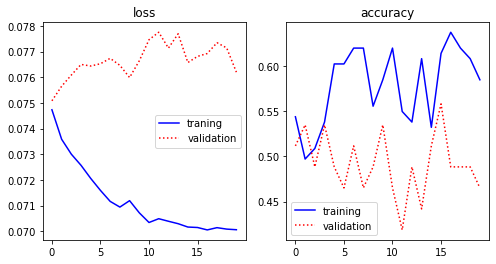

In [100]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(hist.history['loss'], 'b-', label='traning')
plt.plot(hist.history['val_loss'], 'r:', label='validation')
plt.title('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], 'b-', label='training')
plt.plot(hist.history['val_accuracy'], 'r:', label='validation')
plt.title('accuracy')
plt.legend()

plt.show()